# Improve Model Performance Using Boosting and Stacking

# Practice

In this practice, Boosting with Adaboost and Stacking for Classification is used. To compare the results, we will also evaluate a simple Decision Tree and Bagging with Random Forest.

In [ ]:
# general imports
# general imports
import pandas as pd
import numpy as np
from matplotlib import pyplot
from numpy import mean
from numpy import std
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# evaluation imports
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

### 1. Load the Data

In [ ]:
# data imports
#from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
# load data
data_df1=pd.read_csv('/content/sample_data/DS2_C5_S7_KCHouse_Data_Practice.csv')
data_df1.head()
data_df=data_df1

In [ ]:
data_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
data_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

#### Since the label is categorical, it must be encoded as numbers. As the result, malignant is set to 1 and benign to 0.

In [ ]:
data_df['date']=data_df['date'].astype('category')
#data_df['price'] = data_df['price'].str[:4]
data_df["date"] = data_df["date"].str.extract(r"(\d{4})")

In [ ]:
data_df['date']=data_df['date'].astype('int64')

In [ ]:
X1=data_df.iloc[:,1]
X2=data_df.iloc[:,3:]
X = pd.concat([X1, X2], axis=1)
y=data_df.iloc[:,2] # price is the target variable

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=100)
print('Size of training dataset: ', x_train.shape)
print('Size of test dataset: ', x_test.shape)

Size of training dataset:  (15129, 19)
Size of test dataset:  (6484, 19)


### Learn Ensembles

all models are evaluated using repeated stratified k-fold cross-validation, with three repeats and 10 folds. 

the mean and standard deviation of the F1-Score of the model across all repeats and folds are recorded

In [ ]:
# define lists to gather results for plotting later
results, names = list(), list()

### 2. Baseline: Linear Regression (For comparison)

In [ ]:
# define the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
results.append(n_scores)
names.append('LinearReg')
# report performance
print('R2-Score: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

R2-Score: 0.700 (0.014)


### 3.Bagging with Random forest

In [ ]:
# define the model
from sklearn.ensemble import RandomForestRegressor
 
# create regressor object
regressor = RandomForestRegressor() 

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(regressor, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
results.append(n_scores)
names.append('Bagging')
# report performance
print('R2-Score: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

R2-Score: 0.882 (0.018)


### 4. Boosting with Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:

# define the model
model = AdaBoostRegressor()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
results.append(n_scores)
names.append('ada')
# report performance
print('R2-Score: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

R2-Score: 0.091 (0.159)


## Task 5. Stacking

In [ ]:
# required Python libraries
# required Python libraries
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor

In [ ]:

# get a stacking ensemble of models
def get_stacking():
# define the base models
    level0 = list()
    level0.append(('knn', KNeighborsRegressor()))
    level0.append(('cart', DecisionTreeRegressor()))
    level0.append(('svr', SVR()))
# define meta learner model
    level1 = LinearRegression()
# define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

In [ ]:
# define the model
model = get_stacking()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
results.append(n_scores)
names.append('stacking')
# report performance
print('R2-Score: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


R2-Score: 0.795 (0.030)


Comparing the base model Linear Regression , Random Forest and Adaboost regression techniques,
Random Forest is giving higher R2 score(mean) and performs better in prediction

### 3. Plot for Final Comparison

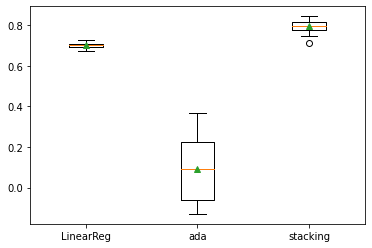

In [ ]:
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Base models used --> KNN, SVR, Decision tree
Meta model- Linear regression